# 신경망 모형

##### 인공신경망(artificial neural networks) 모형은 동물의 뇌신경계를 모방하여 분류(또는 예측)를 위해 만들어진 모형이다.
자연뉴런(natural neurons)이 시냅스(synapse)를 통하여 신호를 전달받은 과정에서, 신호의 강도가 기준치를 초과할 때 뉴런은 활성화되고, 신경 돌기(axon)를 통해 신호를 방출하듯이, 인공신경망에서 입력(inputs)은 시냅스에 해당하며 개별신호의 강도에 따라 가중(weight)되며, 활성함수(activation function)는 인공신경망의 출력(outputs)을 계산한다.
많은 데이터에 대해 학습(learning 또는 training)을 거쳐, 원하는 결과가 나오도록(오차가 작아지는 방향으로) 가중치가 조정된다.
##### 입력층이 (은닉층을 가치지 않고) 직접 출력층에 연결되는 단층신경망(single-layer neural network) 네트워크 구조는 퍼셉트론(perceptron)으로 불리기도 한다.

## [예제1] iris 자료에 대해 신경망 모형을 이용하여 분석
자료의 수는 150개이며 입력변수의 차원은 4이며, 목표값은 3개의 범주로 출력된다.

In [40]:
library(nnet)

In [41]:
nn.iris <- nnet(Species~., data=iris, size=2, rang=0.1, decay=5e-4, maxit=200)

# weights:  19
initial  value 165.151766 
iter  10 value 70.584792
iter  20 value 14.857205
iter  30 value 10.247948
iter  40 value 9.510630
iter  50 value 9.371103
iter  60 value 8.920465
iter  70 value 8.604871
iter  80 value 8.386640
iter  90 value 7.708078
iter 100 value 7.194654
iter 110 value 6.882126
iter 120 value 6.739855
iter 130 value 6.597308
iter 140 value 6.501667
iter 150 value 6.377486
iter 160 value 6.325501
iter 170 value 6.316602
iter 180 value 6.301772
iter 190 value 6.299092
final  value 6.298779 
converged


In [42]:
summary(nn.iris)

a 4-2-3 network with 19 weights
options were - softmax modelling  decay=5e-04
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
 -8.77  -0.49  -1.37   1.87   3.76 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
  0.34   0.60   1.82  -3.02  -1.56 
 b->o1 h1->o1 h2->o1 
 -3.05  -3.53   9.61 
 b->o2 h1->o2 h2->o2 
  6.11  -8.39  -8.47 
 b->o3 h1->o3 h2->o3 
 -3.07  11.92  -1.14 

위의 결과는 연결선의 방향과 가중치를 나타낸다.
##### 적합결과를 시각화하면 다음과 같다.

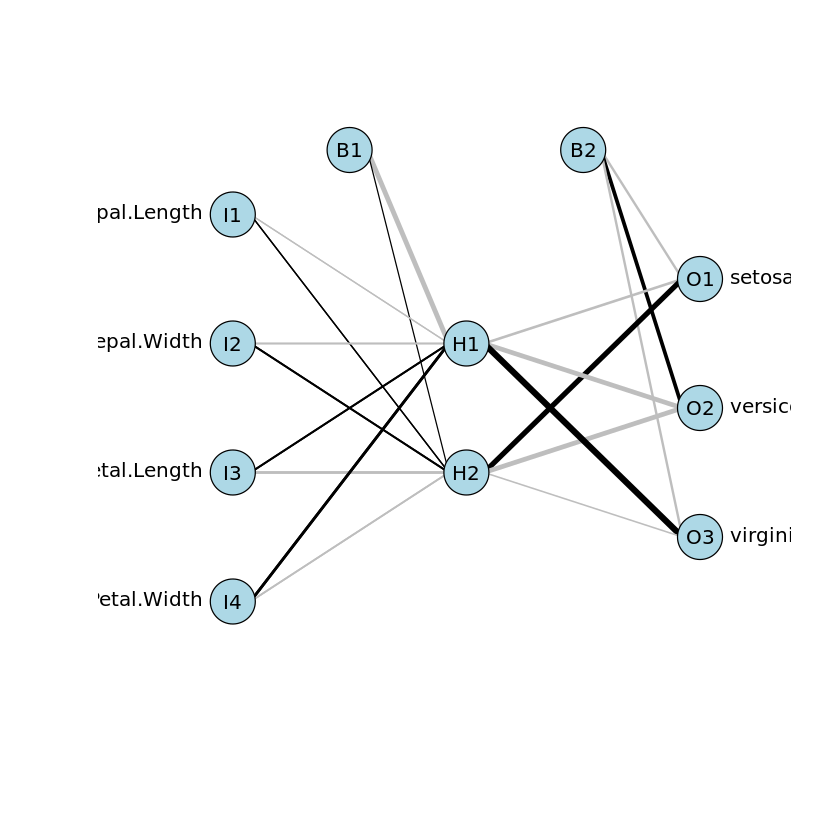

In [43]:
library(clusterGeneration)
library(scales)
library(reshape)
plot(nn.iris)

신경망 모형에 대한 정오분류표(confusion matrix)는 다음과 같다.

In [44]:
table(iris$Species, predict(nn.iris, iris, type = "class"))

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         1
  virginica       0          1        49

## [예제2] 패키지 {neuralnet}의 neuralnet() 함수를 통해 신경망 모형을 적용

자료 infert는 자연유산과 인공유산 후의 불임에 대한 사례-대조 연구 자료로 8개의 변수와 248개의 관측치를 가지고 있다.  
반응변수 case 변수는 (1:사례, 0:대조)를 나타낸다.

In [45]:
data(infert, package="datasets")

In [46]:
str(infert)

'data.frame':	248 obs. of  8 variables:
 $ education     : Factor w/ 3 levels "0-5yrs","6-11yrs",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ age           : num  26 42 39 34 35 36 23 32 21 28 ...
 $ parity        : num  6 1 6 4 3 4 1 2 1 2 ...
 $ induced       : num  1 1 2 2 1 2 0 0 0 0 ...
 $ case          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ spontaneous   : num  2 0 0 0 1 1 0 0 1 0 ...
 $ stratum       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pooled.stratum: num  3 1 4 2 32 36 6 22 5 19 ...


In [47]:
library(neuralnet)

In [48]:
net.infert <- neuralnet(case~age+parity+induced+spontaneous, data=infert, hidden=2, 
                        err.fct="ce", linear.output=FALSE, likelihood=TRUE)

In [49]:
net.infert

$call
neuralnet(formula = case ~ age + parity + induced + spontaneous, 
    data = infert, hidden = 2, err.fct = "ce", linear.output = FALSE, 
    likelihood = TRUE)

$response
    case
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91  

neuralnet() 함수는 다양한 역전파(back-propagation) 알고리즘을 통해 모형을 적합하며,  
수행결과(객체)는 plot() 함수를 통해 다음과 같이 편리하게 시각화 된다.

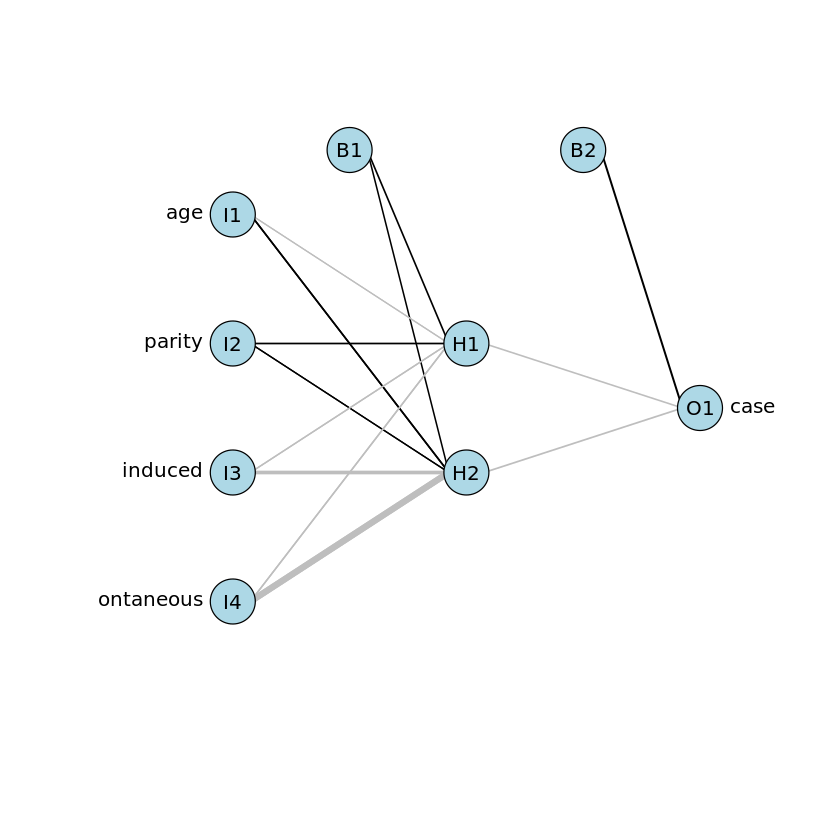

In [50]:
plot.nnet(net.infert)

neuralnet() 함수의 수행 결과의 추가적인 정보는 다음 과정을 통해 확인할 수 있다.

In [51]:
names(net.infert)

[1] "call"                "response"            "covariate"          
 [4] "model.list"          "err.fct"             "act.fct"            
 [7] "linear.output"       "data"                "exclude"            
[10] "net.result"          "weights"             "generalized.weights"
[13] "startweights"        "result.matrix"

이 가운데 결과 행렬에 대한 정보는 다음을 통해 확인할 수 있다.

In [52]:
net.infert$result.matrix

error,1.223850e+02
reached.threshold,9.125337e-03
steps,1.091600e+04
aic,2.707700e+02
bic,3.164446e+02
Intercept.to.1layhid1,5.485285e+00
age.to.1layhid1,-1.221580e-01
parity.to.1layhid1,1.883844e+00
induced.to.1layhid1,-2.222219e+00
spontaneous.to.1layhid1,-3.396408e+00
Intercept.to.1layhid2,3.940006e+00


원 자료와 함께 적합값을 출령하는 절차는 다음과 같다.  
전체자료는 $data에 저장되어 있고, 모형 적합에 사용된 자료는 $covariate과 $response를 통해 확인 가능하며,  
적합값은 $net.result에 제공된다.

In [53]:
out <- cbind(net.infert$covariate, net.infert$net.result[1])
dimnames(out) <- list(NULL, c("age", "parity", "induced", "spontaneous", "nn-output"))
head(out)

age parity induced spontaneous
[1,] 26  6      1       2          
[2,] 42  1      1       0          
[3,] 39  6      2       0          
[4,] 34  4      2       0          
[5,] 35  3      1       1          
[6,] 36  4      2       1          
     nn-output                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
[1,] 0.9910256, 0.6475107, 0.1373390, 0.1441115, 0.3242237, 0.4278353, 0.1432013, 0.1398401, 0.2953914, 0.1387556, 0.1552877, 0.4605897, 0.3032538, 0.1628464, 0.6934089, 0.2794747, 0.1570301, 0.4240802, 0.5819926, 0.8929943, 0.8433440, 0.4963841, 0.8494021, 0.7585811, 0.5541091, 0.9367688, 0.9306007, 0.5971598, 0.9979368, 0.1413631, 0.6340552, 0.1712132, 0.6475107, 0.8963853, 0.5402915, 0.9172392, 0.7585811, 0.9258216, 0.1373729, 0.4908506, 0.7575403, 0.1643818, 0.1955342, 0.8395402, 0.1516789, 0.4697149, 0.8494021, 0.1400317, 0.2625090, 0.7297351, 0.9996879, 0.2822221, 0.2048218, 0.4908506, 0.8638095, 0.9223616, 0.1531501, 0.8494021, 0.4908506, 0.8328511, 0.9172392, 0.3936163, 0.7006812, 0.8870835, 0.1496058, 0.6340552, 0.2953914, 0.9997923, 0.6994455, 0.2144786, 0.3251292, 0.3936163, 0.5985733, 0.1398132, 0.8139612, 0.5985733, 0.2163955, 0.2144786, 0.5985733, 0.7006812, 0.4963841, 0.5263211, 0.3396943, 0.1371017, 0.2035154, 0.1373390, 0.1395052, 0.1921967, 0.1670145, 0.1432013, 0.3982789, 0.2953914, 0.19

가중치의 초기값과 적합값은 $startweights와 $weights에 제공되며, 적합값의 출력 결과는 위의 그림과 동일함을 확인할 수 있다.

In [56]:
head(net.infert$generalized.weights[1])

0.0049057440,-0.092194356,0.114156099,0.178873019
0.1507505632,-2.324780124,2.742354956,4.191377135
0.0003076526,-0.004744425,0.005596614,0.008553787
0.0070658871,-0.108965654,0.128537963,0.196455634
0.1048143357,-1.616380590,1.906713360,2.914194154
0.1298666335,-2.002721328,2.362448260,3.610733031
0.0061821547,-0.095337292,0.112461687,0.171884877
0.0028534801,-0.044004571,0.051908630,0.079336428
0.0952657052,-1.469127631,1.733010962,2.648709827
0.0017569617,-0.027094756,0.031961491,0.048849498
0.0173504272,-0.267567348,0.315627544,0.482400745


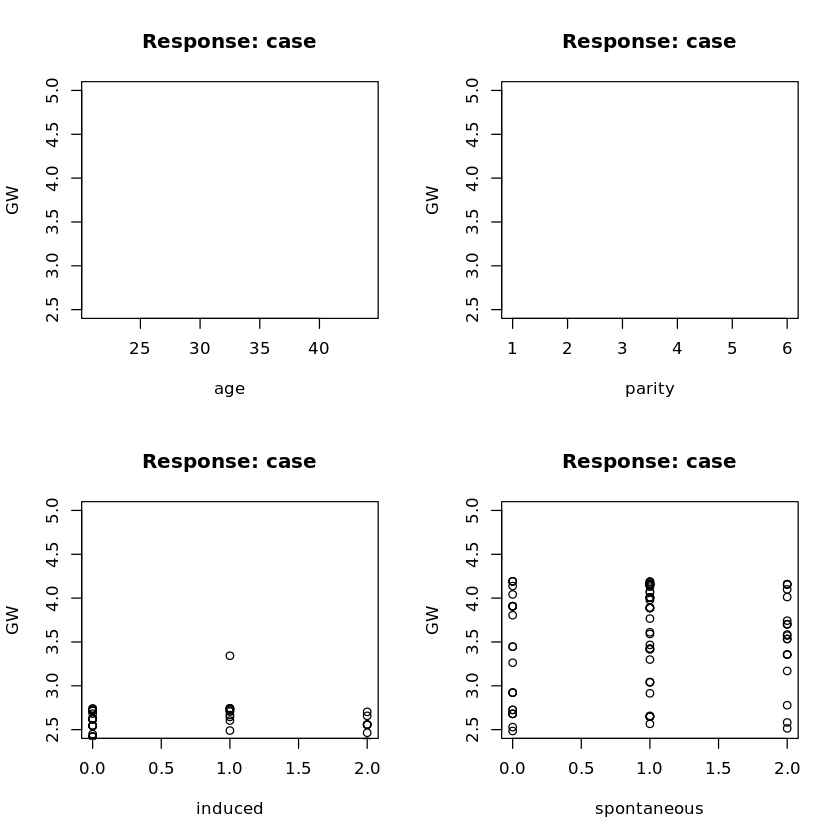

In [57]:
par(mfrow=c(2,2))
gwplot(net.infert, selected.covariate="age", min=2.5, max=5)
gwplot(net.infert, selected.covariate="parity", min=2.5, max=5)
gwplot(net.infert, selected.covariate="induced", min=2.5, max=5)
gwplot(net.infert, selected.covariate="spontaneous", min=2.5, max=5)
par(mfrow=c(1,1))

##### 은닉층의 수를 정할 때는 다음의 사항을 고려한다.
- 다층신경망은 단층신경망에 비해 훈련(training)이 어렵다.
- 시그모이드(sigmoid) 활성함수를 가지는 2개 층의 네트워크(1개 은닉층)는 임의의 의사결정 경계를 모형화 할 수 있다.

##### 각 층의 노드 수(또는 units)의 결정은 다음을 고려하여 결정한다.
- 출력층 노드(output units)의 수는 출력 범주의 수로 결정한다.
- 입력(inputs)의 수는 입력 차원의 수로 결정한다.
- 은닉층 노드(hidden units)의 수는 다음을 고려하여 정한다.  
  - 너무 적으면 네트워크가 복잡한 의사결정 경계를 만들 수 없다.
  - 너무 많으면 네트워크의 일반화가 어렵다.

## [예제3] 패키지 {neuralnet}의 neuralnet() 함수를 통해 다층신경망 모형을 적용하여 분석

0과 100 사이의 난수를 50개 발생시키고, 제곱근을 취한 값을 결과로 하는 자료를 구축한다.  
이 자료를 신경망으로 학습하여 새로운 자료에 대한 예측을 수행한다.

In [59]:
library(neuralnet)
train.input <- as.data.frame(runif(50, min=0, max=100))
train.output <- sqrt(train.input)
train.data <- cbind(train.input, train.output)
colnames(train.data) <- c("Input", "Output")
head(train.data)

Input,Output
<dbl>,<dbl>
93.551304,9.672192
55.619366,7.457839
28.058637,5.297040
3.033813,1.741784
15.796542,3.974486
53.282653,7.299497


1개의 은닉층과 10개의 은닉노드를 가지는 신경망을 적용한다.  
threshold= 옵션은 오차함수의 편미분에 대한 값으로 정지규칙(stopping rule)으로 사용된다.

In [61]:
net.sqrt <- neuralnet(Output~Input, train.data, hidden=10, threshold=0.01)
print(net.sqrt)

$call
neuralnet(formula = Output ~ Input, data = train.data, hidden = 10, 
    threshold = 0.01)

$response
     Output
1  9.672192
2  7.457839
3  5.297040
4  1.741784
5  3.974486
6  7.299497
7  7.366469
8  6.678368
9  6.789545
10 1.612380
11 9.048259
12 9.780857
13 5.879127
14 4.175434
15 6.455481
16 1.899706
17 9.633721
18 9.251574
19 8.535870
20 9.570780
21 5.303576
22 6.522021
23 8.241065
24 6.716817
25 6.024962
26 9.454247
27 7.283440
28 7.915882
29 5.915777
30 6.712214
31 9.796616
32 6.723803
33 7.587563
34 6.284839
35 6.318614
36 3.660087
37 3.291667
38 5.370984
39 5.754305
40 9.216139
41 5.573879
42 3.700903
43 7.900267
44 6.889519
45 6.515144
46 6.816335
47 1.291320
48 5.784856
49 5.329640
50 6.601007

$covariate
               
 [1,] 93.551304
 [2,] 55.619366
 [3,] 28.058637
 [4,]  3.033813
 [5,] 15.796542
 [6,] 53.282653
 [7,] 54.264871
 [8,] 44.600602
 [9,] 46.097927
[10,]  2.599770
[11,] 81.870997
[12,] 95.665157
[13,] 34.564140
[14,] 17.434247
[15,] 41.673238
[16,]  3.608

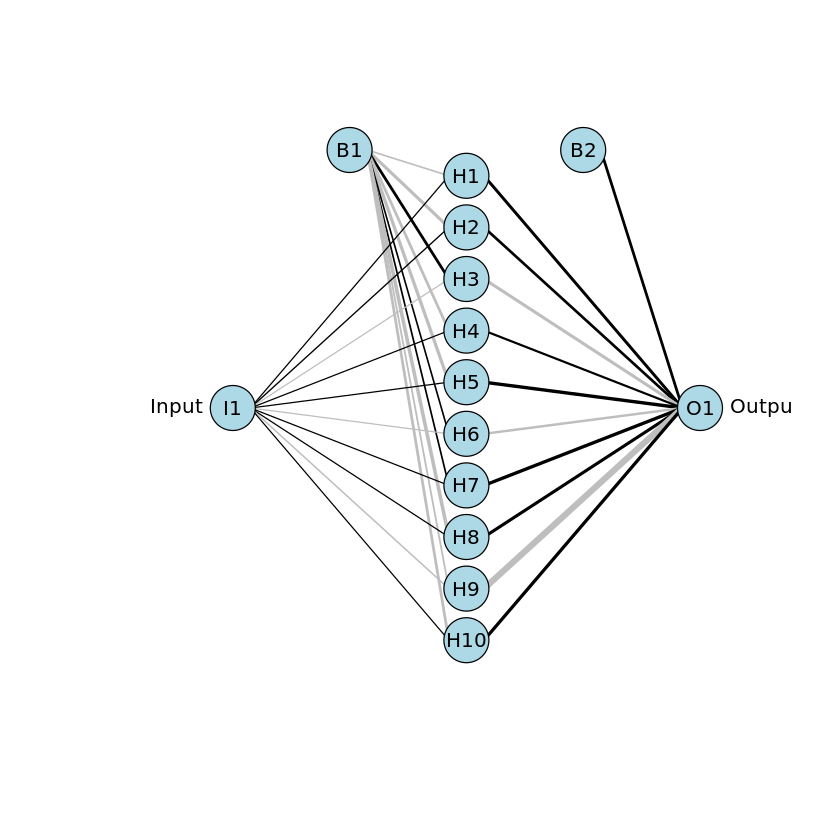

In [63]:
plot.nnet(net.sqrt)

몇 개의 검증용 자료에 대해 구축된 신경망을 적용한다.  
1~10 정수값의 제곱을 취하여 검증용 자료(test.data)를 만든 후, 이 자료에 대해 compute() 함수를 통해 신경망 모형(net.sqrt)를 적용하고, 그 결과를 출력한다.

In [64]:
test.data <- as.data.frame((1:10)^2)
test.out <- compute(net.sqrt, test.data)
ls(test.out)

[1] "net.result" "neurons"

In [66]:
print(test.out$net.result)

          [,1]
 [1,] 1.068436
 [2,] 2.006510
 [3,] 3.033606
 [4,] 3.988050
 [5,] 4.995103
 [6,] 6.004026
 [7,] 6.995307
 [8,] 8.002758
 [9,] 9.013980
[10,] 9.966674


은닉층이 2개인 모형을 적용해 보면 다음과 같다.  
각각의 은닉 노드의 수는 10개, 8개로 한다.  
이를 위해 neuralnet() 함수의 옵션을 hidden=c(10,8)으로 수정하여 위 과정을 실행한다.  
그 결과는 다음과 같다.

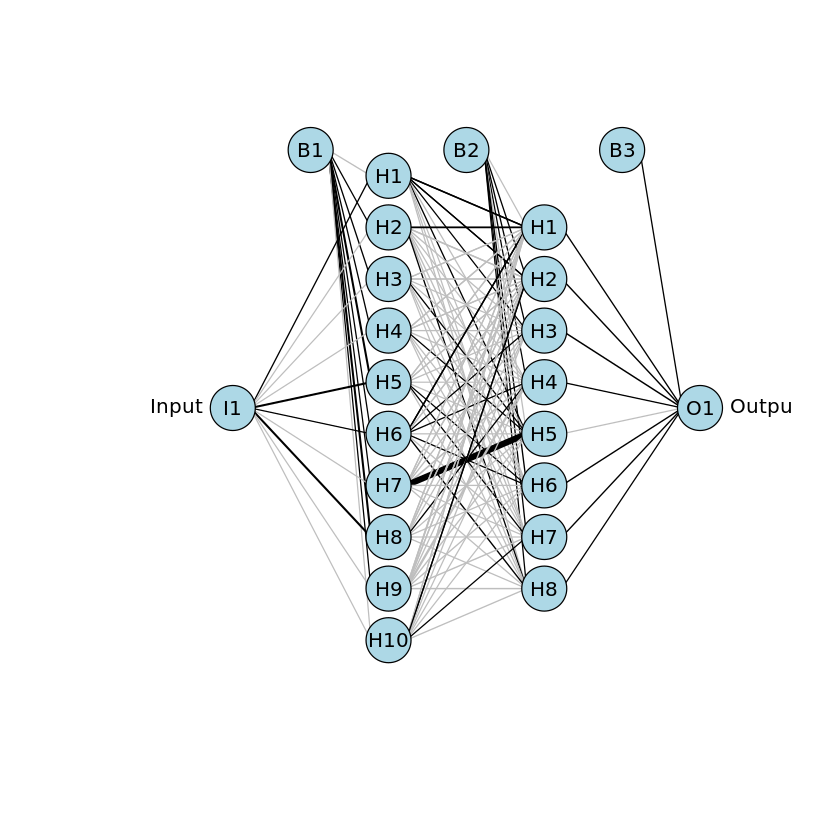

In [69]:
net2.sqrt <- neuralnet(Output~Input, train.data, hidden=c(10,8), threshold=0.01)
plot.nnet(net2.sqrt)

In [70]:
test2.out <- compute(net2.sqrt, test.data)
print(test2.out$net.result)

          [,1]
 [1,] 1.125119
 [2,] 1.997210
 [3,] 2.993874
 [4,] 3.999955
 [5,] 5.007558
 [6,] 5.999880
 [7,] 6.996674
 [8,] 7.998145
 [9,] 9.018010
[10,] 9.956890


# 신경망 모형 장단점

## 장점
- 변수의 수가 많거나 입, 출력 변수 간에 복잡한 비선형 관계가 존재할 때 유용하며,
- 잡음에 대해서도 민감하게 반응하지 않는다.

## 단점
- 결과에 대한 해석이 쉽지 않으며,
- 은닉층의 수와 은닉노드 수의 결정이 어려우며,
- 초기값에 따라 전역해가 아닌 지역해로 수렴할 수 있으며,
- 모형이 복잡하면 훈련과정에 시간이 많이 소요될 수 있다.